<a href="https://colab.research.google.com/github/ADinng/CS6319_MachineLearning/blob/main/CS6319_endterm_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam 24

In [2]:
# exam 24-1题- clusterk-means and em，VarianceThreshold，chi2

import pandas as pd
import numpy as np

# a. read the file (no header)
data = pd.read_csv("https://github.com/andvise/DataAnalyticsDatasets/blob/main/Data.csv?raw=true",header=None)

# b. extract the categorical feture to use as cluster lables
features = data.drop(0, axis=1)
labs = data[0].copy()

# c. apply imputation and rescaling if necessary
    # 1) check for miss value
features.describe()
features.isnull().sum()

    # 2)hand miss value
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(features)
X = imputer.transform(features)
features = pd.DataFrame(X, columns=features.columns)

    # 3)再次检查是否imputer成功
features.isnull().sum()

    # 4) rescaling -->use standscaler( minmax范围0-1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

  # 1)check 有几个cluster(2选1)
labs.value_counts()
labs.unique()


  # 2)apply kmeans and rand_score
from sklearn.cluster import KMeans
kms= KMeans(n_clusters=3)
kms.fit(features)
print(kms.labels_)

from sklearn import metrics
kms_score = metrics.rand_score(labs, kms.labels_)
print("KMeans Rand Score:", kms_score)


  # 3)apply EM
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3)
gm.fit(features)
prediction = gm.predict(features)
print(prediction)

gm_score = metrics.rand_score(labs, prediction)
print("EM Rand Score:", gm_score)


# e) Apply the VarianceThreshold method to remove at least one feature. (4 marks)

  # 1)检查每个特征对应的方差值是多少(其实就是每个列对应的方差值)(8列，排除最小的0.001)
print(pd.DataFrame(features).var())

  # 2)apply the variancethreshold method
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
features_new = selector.fit_transform(features)

  # 3) 查看剩余的方差值
print(pd.DataFrame(features_new).var())

print("Original number of features:", features.shape[1])
print("Number of features after variance threshold filtering:", features_new.shape[1])

# f) Apply the Chi2 method to remove at least one more feature. (4 marks)

  # 1)查看剩余特征个数-7个
features_new.shape[1]

  # 2) apply the chi2 method（上面查看剩余7个，这里写6,提取前6个）
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=6)
features_new2 = selector.fit_transform(features_new,labs)

# 3）检查过滤结果-发现提取了前6个
features_new2.shape[1]


print("Original number of features:", features.shape[1])
print("After VarianceThreshold:", features_new.shape[1])
print("After Chi2 selection:", features_new2.shape[1])


# d.Apply k-means and expectation maximisation.Use the rand score function and the cluster labels to compute clustering accuracy.

if kms_score > gm_score:
    print("KMeans is better, reapplying it")
else:
    print("EM is better, reapplying it")


kms= KMeans(n_clusters=3)
kms.fit(features_new2)

kms_score = metrics.rand_score(labs, kms.labels_)
print(kms_score)

,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0


In [ ]:
# exam 2024-2题目 APriori

import numpy as np
import pandas as pd
from apyori import apriori

data = pd.read_csv("http://fimi.uantwerpen.be/data/mushroom.dat",header=None,delim_whitespace=True)
data

records = []
for i in range(0, 8124):
  records.append([str(data.values[i,j]) for j in range(0,23)])
print(len(records))

# length exactly =2
rules = apriori(records, min_support=0.02, min_confidence=0.5, min_lift=40, min_length=2, max_length=2)
results = list(rules)
print(len(results))

for item in results:
  pair = item[0]
  items = [x for x in pair]
  print("Rule: "+items[0]+ " -> " + items[1])
  print("Support: " + str(item[1]))
  print("Confidence: "+ str(item[2][0][2]))
  print("Lift: "+ str(item[2][0][3]))
  print("======================================")

# Exam 23

In [ ]:
# exam 23 - 1题, PCA
import numpy as np
import pandas as pd

# a.read data
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv")

# b.Extract the 12 numerical attributes. Do not impute or rescale them.
data = data.iloc[:,:12]

# c. Apply Principal Component Analysis (PCA) to find the two main components of the 12numerical attributes.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pcadata = pca.fit_transform(data)

# d.plot the two components using a scatter plot.
import matplotlib.pyplot as plt
pcadf = pd.DataFrame(data=pcadata, columns=['pc1','pc2'])
plt.figure(figsize=(8,6))
plt.scatter(pcadf['pc1'],pcadf['pc2'],alpha=0.5)
plt.title('PCA Results')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

# find the total explained variance ratio of the two components
# print(pca.explained_variance_ratio_)
print(pca.explained_variance_.sum())

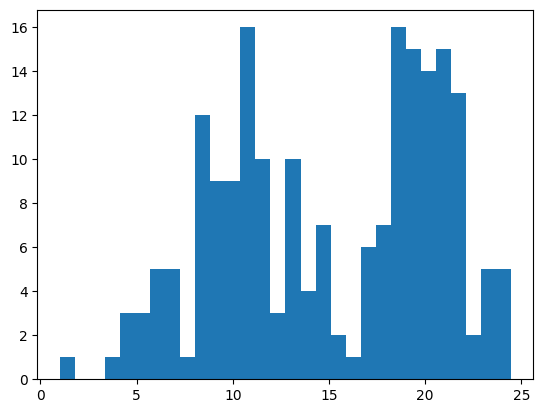

0.9703015075376884


In [ ]:
# exam 23 - 2题 Gaussian mixture model
from numpy import hstack
from numpy.random import normal
from matplotlib import pyplot

# a. Generate artificial 1-dimensional data, containing 100 real numbers with mean 10 and standarddeviation 3, and 100 with mean 20 and standard deviation 2
X1 = normal(loc=10, scale=3, size=100)
X2 = normal(loc=20, scale=2, size=100)
X = hstack((X1, X2))
X = X.reshape((len(X),1))

pyplot.hist(X, bins=30)
pyplot.show()

# b.Fit a Gaussian mixture model to the data. (因为两个正态分布x1,x2，所以n_components=2)
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2)
gm.fit(X)

# c.Use “predict” method to obtain a list of predicted cluster labels for the 200 data points,就是X全部有200个
y = gm.predict(X)


# d.Calculate how accurate the predictions are by measuring the rand score.
# 需要计算实际标签，其实由0,1组成(写为100个0，100个1)
true_labels = [0] * 100 + [1] * 100
from sklearn import metrics
gm_score = metrics.rand_score(true_labels, y)
print(gm_score)

In [ ]:
# exam23 - 3题.apyori

import numpy as np
import pandas as pd
from apyori import apriori

# a. read data, and check data -->no header, separators use spaces
data = pd.read_csv("http://fimi.uantwerpen.be/data/chess.dat")
data = pd.read_csv("http://fimi.uantwerpen.be/data/chess.dat",header=None,delim_whitespace=True)
data
# 3196rows x 37 columns

# b.Transform the DataFrame into a form that the apyori system can use.
records = []
for i in range(len(data)):
    records.append([str(data.iloc[i, j]) for j in range(data.shape[1])])

records = []
for i in range(0, 3196):
  records.append([str(data.values[i,j]) for j in range(0,37)])
print(len(records))

# c.generate rules,  with length 2 (no longer or shorter), support at least 0.01, confidence at least 2 and lift at least 3
rules = apriori(records, min_support=0.01, min_confidence=2, min_lift=3, min_length=2, max_length=2)
results = list(rules)
print(len(results))

# d.print out the rules in a readable form
for item in results:
  pair = item[0]
  items = [x for x in pair]
  print("Rule: "+items[0]+ " -> " + items[1])
  print("Support: " + str(item[1]))
  print("Confidence: "+ str(item[2][0][2]))
  print("Lift: "+ str(item[2][0][3]))
  print("======================================")

# Clustering _lab 4

In [ ]:
#Unsupervised learning: Clustering
# lab 4 clustering k-means,gaussianmixture, EM
import pandas as pd
import numpy as np


# no header and that the separators are spaces,没有头，分隔符是空格
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt",sep='\s+', header = None)
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt",header=None,delim_whitespace=True)
data.shape
data.head()
data[7].value_counts()

# Extract columns:
features = data.iloc[:,:7]
labs = data.iloc[:,7]

features = data.iloc[:,:-1]
labs = data.iloc[:, -1]
labs = labs-1
# 因为labs是1,2,3,需要的是0,1,2

# Apply k-means
from sklearn.cluster import KMeans
kms= KMeans(n_clusters=3)
kms.fit(features)
print(kms.labels_)
# look at the predictions


# evaluate the predictions
from sklearn import metrics
kms_score = metrics.rand_score(labs, kms.labels_)
print(kms_score)


# Apply EM
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3)
gm.fit(features)
prediction = gm.predict(features)
print(prediction)


gm_score = metrics.rand_score(labs, prediction)
print(gm_score)

if gm_score > kms_score:
    print("EM/GMM is more accurate.")
else:
    print("K-Means is more accurate.")

# Apply DBSCAN
from sklearn.cluster import DBSCAN

features = np.array([[1,2],[2,2],[2,3],[8,7],[8,8],[25,80]])
db = DBSCAN(eps=3, min_samples=2)
dbscan = db.fit(features)
print(dbscan.labels_)


# 生成normal数据
from numpy import hstack
from numpy.random import normal
from matplotlib import pyplot

# 由numpy.random.normal生成一个均值为20，标准差为5，含3000个数据点的正态分布数据集 X1
# 由numpy.hstack 将X1和X2合并成一个包含10000个数据点的单一数组X。前3000个点来自X1，后7000个点来自X2
# reshape 将X 转换为一个二维数组，形状为 (10000, 1)
X1 = normal(loc=20, scale=5, size=3000)
X2 = normal(loc=40, scale=5, size=7000)
X = hstack((X1, X2))
X = X.reshape((len(X),1))

# 绘制X的直方图, bins=50,数据分成 50 个柱状图块
pyplot.hist(X, bins=50)
pyplot.show()

from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2)
gm.fit(X)
y = gm.predict(X)
print(y[:100])
print(y[-100:])

Xnew, ynew = gm.sample(6)
print(Xnew)
print(ynew)

<ipython-input-4-edec3008a64f>:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt",header=None,delim_whitespace=True)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2]
0.8743677375256322
[2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 2 2 2 2 2 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 1 2 2 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0]
0.9115516062884484
EM/GMM is more accurate.


# ARM

In [ ]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=9e2bc5a4903df105a8c799a9a9afc4983a3362d56b40659950fee7a1470e0a41
  Stored in directory: /root/.cache/pip/wheels/77/3d/a6/d317a6fb32be58a602b1e8c6b5d6f31f79322da554cad2a5ea
Successfully built apyori


In [ ]:
# ARM(Unsupervised learning: association rule mining)
import numpy as np
import pandas as pd
from apyori import apriori

data = pd.read_csv("https://github.com/andvise/DataAnalyticsDatasets/blob/78a9bd799b5fbf35344beff50304169f789d264c/Market_Basket_Optimisation.csv?raw=true", header=None)

# 有7501行,20列, transform tha dataframe into a form that the apyori system can use.
print(data)
records = []
for i in range(0, 7501):
  records.append([str(data.values[i,j]) for j in range(0,20)])

#support: 35/7500 = 0.0045, lift提升度：规则的有效性,length=2,关联规则至少包含2个商品
rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
results = list(rules)
print(len(results))
print(results[0])

for item in results:
  pair = item[0]
  items = [x for x in pair]
  print("Rule: "+items[0]+ " -> " + items[1])
  print("Support: " + str(item[1]))
  print("Confidence: "+ str(item[2][0][2]))
  print("Lift: "+ str(item[2][0][3]))
  print("======================================")

RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)])

In [ ]:
# exam 2024

import numpy as np
import pandas as pd
from apyori import apriori

data = pd.read_csv("http://fimi.uantwerpen.be/data/mushroom.dat",header=None,delim_whitespace=True)
data

records = []
for i in range(0, 8124):
  records.append([str(data.values[i,j]) for j in range(0,23)])
print(len(records))

# length exactly =2
rules = apriori(records, min_support=0.02, min_confidence=0.5, min_lift=40, min_length=2, max_length=2)
results = list(rules)
print(len(results))

for item in results:
  pair = item[0]
  items = [x for x in pair]
  print("Rule: "+items[0]+ " -> " + items[1])
  print("Support: " + str(item[1]))
  print("Confidence: "+ str(item[2][0][2]))
  print("Lift: "+ str(item[2][0][3]))
  print("======================================")

<ipython-input-32-4f0cc62c6285>:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("http://fimi.uantwerpen.be/data/mushroom.dat",header=None,delim_whitespace=True)


8124
1
Rule: 73 -> 83
Support: 0.023633677991137372
Confidence: 1.0
Lift: 42.3125


# Dimensionality reduction
- feature selection: Variance Threshold, Chi2
    - method approaches:
      - filter
      - wrapper
      - embedded
- feature extraction/learning:PCA

In [ ]:
# feature selection:
# filter method: use a proxy measure
# Chi2 - categorical

# VarianceThreshold 方差选择，方差大于等于 0.1 的特征会被保留
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.1)
X_new = selector.fit_transform(X)

# Chi2 卡方校验,适用于非负数据（比如计数数据或频率），常用于分类任务
# k=2 表示选择前2个得分最高的特征,(衡量特征和目标之间的独立性：卡方值越大，说明特征和目标越相关)
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=2)
X_new = selector.fit_transform(X, y)

# PCA
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1,1],[-2,-1],[-3,-2],[1,1],[2,1],[3,2]])
pca = PCA(n_components=2)
pca.fit(X)

# 解释方差比例
print(pca.explained_variance_ratio_)
# 输出奇异值
print(pca.singular_values_)

# Neural networks

In [ ]:
# MLP regression
import pandas as pd
import numpy as np
import sklearn

data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data")
data
# two attribute be predicted, motor_UPDRS, and total_UPDRS,choose 1 of these, and delete the other, and drop subject#(is just a row number)
data.drop(labels=['subject#', 'motor_UPDRS'], axis=1, inplace=True)

# split into train and test
from sklearn.model_selection import train_test_split
datatrain, datatest = train_test_split(data, test_size=0.2)

# extract labels
trainlabs = datatrain.loc[:,'total_UPDRS']
traindata = datatrain.drop(labels=['total_UPDRS'], axis=1)
testlabs = datatest.loc[:,'total_UPDRS']
testdata = datatest.drop(labels=['total_UPDRS'], axis=1)

# rescale based on the training data
from sklearn.preprocessing import StandardScaler
sclaer = StandardScaler()
traindatar = sclaer.fit_transform(traindata)
testdatar = sclaer.transform(testdata)

# try 3 regressors, A linear one
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
split = ShuffleSplit(n_splits=10, test_size=0.2)
scores = cross_val_score(linreg, traindatar, trainlabs, scoring="neg_mean_squared_error", cv=split)
rmse = np.sqrt(-scores)
print("LS RMSE =", rmse.mean(), " stddev =", scores.std())
# LS RMSE = 9.692187534169982  stddev = 2.304681679339098

# try MLPRegressor
# MLP with default parameters, mlpreg = MLPRegressor()
# 修改参数：MLPRegressor(hidden_layer_sizes=(20,20,20)),表示有三个网络层,第一hiddenlayer有20个神经元,第2hidden layer有20个神经元,第3hidden layer有20个神经元,
# MLPRegressor(hidden_layer_sizes=(50, 30), activation='relu', max_iter=1000, random_state=42), 两个层，分别50和30个神经元,激活函数relu,
from sklearn.neural_network import MLPRegressor

mlpreg = MLPRegressor() # rmse = 7.9, stddev = 2.8
mlpreg = MLPRegressor(hidden_layer_sizes=(20,20,20)) #rmse=6.9, stddev=5.01
scores = cross_val_score(mlpreg, traindatar, trainlabs, scoring="neg_mean_squared_error", cv=split)
rmse = np.sqrt(-scores)
print("MLP RMSE =", rmse.mean(), " stddev =", scores.std())

# apply the regressors to the test data
# fit each regressor again, find their predictions, and compute the errors
from sklearn.metrics import mean_squared_error
linreg.fit(traindatar, trainlabs)
y = linreg.predict(testdatar)
mse = mean_squared_error(testlabs, y)
rmse = np.sqrt(mse)
print("LIN test error = ", rmse)
# LIN test error =  9.741855670538472

# mlp
mlpreg.fit(traindatar, trainlabs)
y = mlpreg.predict(testdatar)
mse = mean_squared_error(testlabs, y)
rmse = np.sqrt(mse)
print("MLP test error = ", rmse)
# MLP test error =  6.093603183111678

In [ ]:
# MLP classification
import pandas as pd
import numpy as np
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv")

# drop stab, and leaving stabf as the class label
data = data.drop("stab", axis=1)
datavars = data.drop("stabf", axis=1)
datalabs = data["stabf"].copy()

scaler = MinMaxScaler()
datavarsr = scaler.fit_transform(datavars)

le = LabelEncoder()
datalabse = le.fit_transform(datalabs)

from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(hidden_layer_sizes=(200), max_iter=1000)
split = ShuffleSplit(n_splits=10, test_size=0.2)
scores = cross_val_score(classifier, datavarsr, datalabse, scoring="accuracy", cv=split)
print("MLP accuracy =",scores.mean()," stddev =", scores.std())
# MLP accuracy = 0.9647500000000001  stddev = 0.0035443617196894497

MLP accuracy = 0.9647500000000001  stddev = 0.0035443617196894497


In [ ]:
# Binary classification with Keras
import pandas as pd
import numpy as np
import sklearn

data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv")

data = data.drop("stab", axis=1)

from sklearn.model_selection import train_test_split
datatrain, datatest = train_test_split(data, test_size=0.2)

# drop an attribute and separating labels
traindata = datatrain.drop("stabf", axis=1)
trainlabs = datatrain["stabf"].copy()
testdata = datatest.drop("stabf", axis=1)
testlabs = datatest["stabf"].copy()

# rescaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
traindatar = scaler.fit_transform(traindata)
testdatar = scaler.transform(testdata)

# label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
trainlabse = le.fit_transform(trainlabs)
testlabse = le.transform(testlabs)

# use Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# for binary classification we need a sigmoid neuron to give a probability(0-1)
model = keras.models.Sequential()
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

# compile the model(编译模型)
model.compile(loss="binary_crossentropy", metrics=["accuracy"])

# model fit the dataset
model.fit(traindatar, trainlabse, epochs=50)

# apply the trained network to the test data
model.evaluate(testdatar, testlabse)
# accuracy: 0.94

In [ ]:
# Multiclass classification with Keras
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import OneHotEncoder

# reade data
datatrain = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra", header=None)
datatest = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes", header=None)

# split off labels
traindata = datatrain.drop(64, axis=1)
trainlabs = datatrain[64].copy()
testdata = datatest.drop(64, axis=1)
testlabs = datatest[64].copy()

# one-hot encoder
# sparse =false, 默认会返回稀疏矩阵，但是false后，返回普通numpy数组(密集矩阵)
# enc = OneHotEncoder(sparse=False) 旧版本
enc = OneHotEncoder(sparse_output=False)
trainlabs = enc.fit_transform(trainlabs.to_numpy().reshape(-1,1))
testlabs = enc.transform(testlabs.to_numpy().reshape(-1,1))

# if the input is 2D image, we should first use Flatten layer, again with an input_shape, 28*28images
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# use Keras, create the model
# add a dense layer of ReLU neurons
# as for binary classification, add a softmax layer of 10 neurons (输出10个类所以写10)
model = keras.models.Sequential()
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# loss function use categorical_crossentropy
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

# fit the network to the data
model.fit(traindata, trainlabs, epochs=50)

# evaluate the testing data accuracy: 0.9587
model.evaluate(testdata, testlabs)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3580 - loss: 3.9527
Epoch 2/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8850 - loss: 0.3783
Epoch 3/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9415 - loss: 0.1940
Epoch 4/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9623 - loss: 0.1249
Epoch 5/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9707 - loss: 0.1018
Epoch 6/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9768 - loss: 0.0778
Epoch 7/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9804 - loss: 0.0662
Epoch 8/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9800 - loss: 0.0637
Epoch 9/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9840 - loss: 0.0532
Epoch 10/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9842 - loss: 0.0484
Epoch 11/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9869 - loss: 0.0398
Epoch 12/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [ ]:
# Dropout for overfitting
# Dropout is one of the most popular ways of preventing overfifitting
# Dropout only has an effect during fitting: when a trained network is evaluated, it just passes data unchanged

# 参数 0.1：表示每次训练时，随机丢弃 10% 的输入单元
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout

model = keras.models.Sequential()
model.add(Dropout(0.1, input_shape=(64,)))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(Dropout(0.1))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(traindata, trainlabs, epochs=50)

Epoch 1/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.3170 - loss: 3.8461
Epoch 2/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7525 - loss: 0.7343
Epoch 3/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8363 - loss: 0.5243
Epoch 4/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8656 - loss: 0.4081
Epoch 5/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8778 - loss: 0.3799
Epoch 6/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9008 - loss: 0.3216
Epoch 7/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9082 - loss: 0.2810
Epoch 8/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9102 - loss: 0.2701
Epoch 9/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9241 - loss: 0.2265
Epoch 10/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9224 - loss: 0.2418
Epoch 11/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9303 - loss: 0.2128
Epoch 12/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [ ]:
# Regression with Keras
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout

# read data
housing = pd.read_csv("https://github.com/ageron/handson-ml/raw/master/datasets/housing/housing.csv")

# splite data
trainset, testset = train_test_split(housing, test_size=0.2)

# Drop a categorical variable, split train and test sets into data and labels
traindata = trainset.drop("median_house_value", axis=1)
trainlabs = trainset["median_house_value"].copy()
trainnum = traindata.drop("ocean_proximity", axis=1)
testdata = testset.drop("median_house_value", axis=1)
testlabs = testset["median_house_value"].copy()
testnum = testdata.drop("ocean_proximity", axis=1)

# Defin new attributes
trainnum["rooms_per_household"] = trainnum["total_rooms"] /trainnum["households"]
trainnum["bedrooms_per_room"] = trainnum["total_bedrooms"] /trainnum["total_rooms"]
trainnum["population_per_household"] = trainnum["population"] /trainnum["households"]
testnum["rooms_per_household"] = testnum["total_rooms"] /testnum["households"]
testnum["bedrooms_per_room"] = testnum["total_bedrooms"] /testnum["total_rooms"]
testnum["population_per_household"] = testnum["population"] /testnum["households"]

# Impute
imputer = SimpleImputer(strategy="median")
imputer.fit(trainnum)
X = imputer.transform(trainnum)
trainnum = pd.DataFrame(X, columns=trainnum.columns)
Y = imputer.transform(testnum)
testnum = pd.DataFrame(Y, columns=testnum.columns)

# Rescale
scaler = StandardScaler()
trainnumr = scaler.fit_transform(trainnum)
testnumr = scaler.transform(testnum)


# for regression the final layer is a single neuron
# apply keras,  used 3 hidden layers with 100 neurons each:
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, activation="relu", input_shape=(11,)))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(1))
model.compile(loss="mean_squared_error")
model.fit(trainnumr, trainlabs, epochs=50)

# evaluate data
model.evaluate(testnumr, testlabs)

# =================== Keras allows shorthand notation for the sequential model

model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=(11,)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1)
])